# EDA on US 2020 election results compared to vaccination rates

---

## Preliminary plots to get idea of spread

### Merge data sets

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/ralidimitrova/DS4A_team27/master/data/clean/election_results_us.csv" 

df20 = pd.read_csv(url, delimiter=',')

df20.head()

,fips,state,county,votes_dem,votes_gop,total_votes,per_dem,per_gop,per_point_diff
0,1001,Alabama,Autauga County,7503,19838,27770,0.270184,0.714368,0.444184
1,1003,Alabama,Baldwin County,24578,83544,109679,0.224090,0.761714,0.537623
2,1005,Alabama,Barbour County,4816,5622,10518,0.457882,0.534512,0.076631
3,1007,Alabama,Bibb County,1986,7525,9595,0.206983,0.784263,0.577280
4,1009,Alabama,Blount County,2640,24711,27588,0.095694,0.895716,0.800022


In [3]:
url = 'https://raw.githubusercontent.com/ralidimitrova/DS4A_team27/master/data/clean/vaccination_rate_US.csv'
df_vacc = pd.read_csv(url, delimiter=',')
df_vacc.head()

,fips,state,county,state_abb,popfull_per,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per
0,1001,Alabama,Autauga County,AL,34.0,39.9,41.8,61.7,43.1,50.6,52.6,74.5
1,1003,Alabama,Baldwin County,AL,42.7,49.5,51.9,75.3,54.4,63.0,65.7,91.1
2,1005,Alabama,Barbour County,AL,35.7,41.1,43.0,66.1,46.6,53.8,56.0,76.3
3,1007,Alabama,Bibb County,AL,29.7,34.2,35.7,57.0,37.3,42.8,44.7,64.5
4,1009,Alabama,Blount County,AL,26.4,31.0,32.9,49.5,32.8,38.5,40.6,57.3


In [4]:
df_merge = pd.merge(df_vacc, df20, on='fips')

df_merge.head()

,fips,state_x,county_x,state_abb,popfull_per,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per,state_y,county_y,votes_dem,votes_gop,total_votes,per_dem,per_gop,per_point_diff
0,1001,Alabama,Autauga County,AL,34.0,39.9,41.8,61.7,43.1,50.6,52.6,74.5,Alabama,Autauga County,7503,19838,27770,0.270184,0.714368,0.444184
1,1003,Alabama,Baldwin County,AL,42.7,49.5,51.9,75.3,54.4,63.0,65.7,91.1,Alabama,Baldwin County,24578,83544,109679,0.224090,0.761714,0.537623
2,1005,Alabama,Barbour County,AL,35.7,41.1,43.0,66.1,46.6,53.8,56.0,76.3,Alabama,Barbour County,4816,5622,10518,0.457882,0.534512,0.076631
3,1007,Alabama,Bibb County,AL,29.7,34.2,35.7,57.0,37.3,42.8,44.7,64.5,Alabama,Bibb County,1986,7525,9595,0.206983,0.784263,0.577280
4,1009,Alabama,Blount County,AL,26.4,31.0,32.9,49.5,32.8,38.5,40.6,57.3,Alabama,Blount County,2640,24711,27588,0.095694,0.895716,0.800022


In [5]:
df = df_merge

In [6]:
df = df[['fips', 'state_x', 'county_x', 'per_dem', 'per_gop','per_point_diff', 'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per', 'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per']]
df.head()

,fips,state_x,county_x,per_dem,per_gop,per_point_diff,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per
0,1001,Alabama,Autauga County,0.270184,0.714368,0.444184,39.9,41.8,61.7,43.1,50.6,52.6,74.5
1,1003,Alabama,Baldwin County,0.224090,0.761714,0.537623,49.5,51.9,75.3,54.4,63.0,65.7,91.1
2,1005,Alabama,Barbour County,0.457882,0.534512,0.076631,41.1,43.0,66.1,46.6,53.8,56.0,76.3
3,1007,Alabama,Bibb County,0.206983,0.784263,0.577280,34.2,35.7,57.0,37.3,42.8,44.7,64.5
4,1009,Alabama,Blount County,0.095694,0.895716,0.800022,31.0,32.9,49.5,32.8,38.5,40.6,57.3


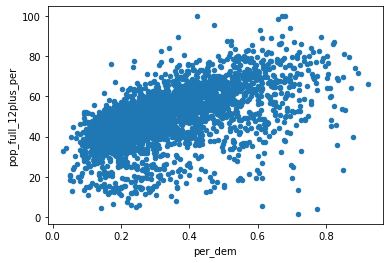

In [7]:
ax1 = df.plot.scatter(x='per_dem', y= 'pop_full_12plus_per')

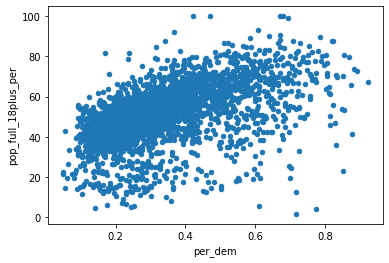

In [8]:
ax2 = df.plot.scatter(x='per_dem', y= 'pop_full_18plus_per')

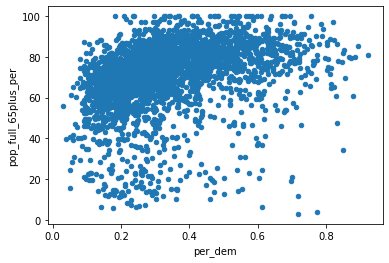

In [9]:
ax3 = df.plot.scatter(x='per_dem', y= 'pop_full_65plus_per')

#### Lots of data points so plot very dense - split dataframe into republican and democrat counties

In [10]:
df1, df2 = [x for _, x in df.groupby(df['per_dem'] <= 0.5)]
df1.head()
#splitting the data frame into gop and dem counties

,fips,state_x,county_x,per_dem,per_gop,per_point_diff,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per
5,1011,Alabama,Bullock County,0.747019,0.248428,-0.498591,50.2,51.5,72.9,53.3,62.0,63.4,85.3
23,1047,Alabama,Dallas County,0.684617,0.309225,-0.375392,42.5,44.8,63.4,49.6,58.3,61.3,83.4
31,1063,Alabama,Greene County,0.813403,0.183246,-0.630157,48.2,50.5,66.9,55.7,64.9,67.4,84.2
32,1065,Alabama,Hale County,0.591644,0.402676,-0.188967,62.2,64.4,78.6,62.7,74.3,76.2,89.2
36,1073,Alabama,Jefferson County,0.557585,0.426097,-0.131488,58.0,60.0,84.3,61.2,72.2,74.2,95.1


In [11]:
df2.head()

,fips,state_x,county_x,per_dem,per_gop,per_point_diff,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per
0,1001,Alabama,Autauga County,0.270184,0.714368,0.444184,39.9,41.8,61.7,43.1,50.6,52.6,74.5
1,1003,Alabama,Baldwin County,0.224090,0.761714,0.537623,49.5,51.9,75.3,54.4,63.0,65.7,91.1
2,1005,Alabama,Barbour County,0.457882,0.534512,0.076631,41.1,43.0,66.1,46.6,53.8,56.0,76.3
3,1007,Alabama,Bibb County,0.206983,0.784263,0.577280,34.2,35.7,57.0,37.3,42.8,44.7,64.5
4,1009,Alabama,Blount County,0.095694,0.895716,0.800022,31.0,32.9,49.5,32.8,38.5,40.6,57.3


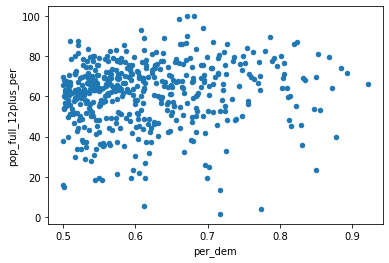

In [12]:
ax4 = df1.plot.scatter(x='per_dem', y= 'pop_full_12plus_per')

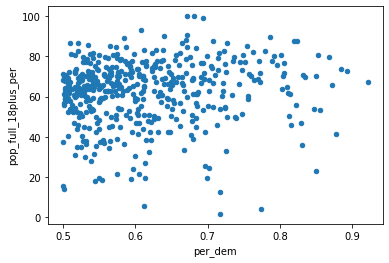

In [13]:
ax5 = df1.plot.scatter(x='per_dem', y= 'pop_full_18plus_per')

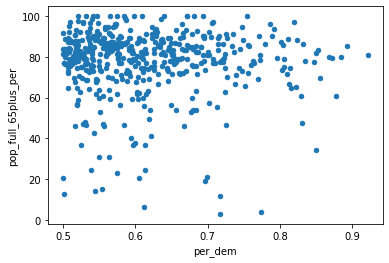

In [14]:
ax6 = df1.plot.scatter(x='per_dem', y= 'pop_full_65plus_per')

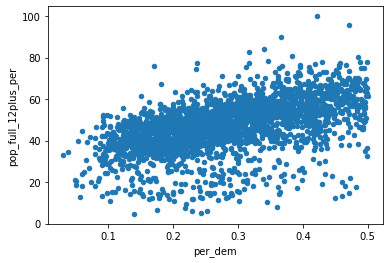

In [15]:
ax7 = df2.plot.scatter(x='per_dem', y= 'pop_full_12plus_per')

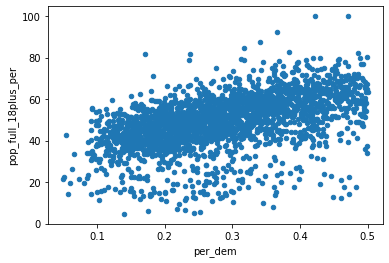

In [16]:
ax8 = df2.plot.scatter(x='per_dem', y= 'pop_full_18plus_per')

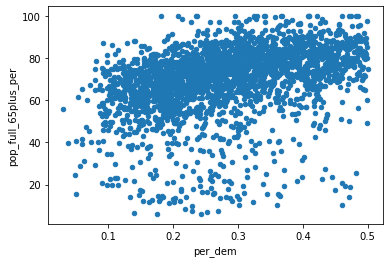

In [17]:
ax9 = df2.plot.scatter(x='per_dem', y= 'pop_full_65plus_per')

In [18]:
corrm = df.corr()
corrm #r2 values

,fips,per_dem,per_gop,per_point_diff,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per
fips,1.000000,-0.052653,0.054194,0.053442,0.036096,0.058431,0.065724,0.052576,0.020263,0.035610,0.044455
per_dem,-0.052653,1.000000,-0.998850,-0.999710,0.555755,0.509924,0.332964,0.553197,0.562282,0.516351,0.341942
per_gop,0.054194,-0.998850,1.000000,0.999715,-0.564272,-0.519880,-0.342785,-0.561484,-0.569523,-0.525343,-0.351235
per_point_diff,0.053442,-0.999710,0.999715,1.000000,-0.560180,-0.515070,-0.337994,-0.557520,-0.566067,-0.521018,-0.346710
pop_full_12plus_per,0.036096,0.555755,-0.564272,-0.560180,1.000000,0.997884,0.871078,0.972384,0.975239,0.975047,0.853156
pop_full_18plus_per,0.058431,0.509924,-0.519880,-0.515070,0.997884,1.000000,0.892398,0.966648,0.973190,0.975997,0.871518
pop_full_65plus_per,0.065724,0.332964,-0.342785,-0.337994,0.871078,0.892398,1.000000,0.834866,0.840599,0.865101,0.968061
pop_first_per,0.052576,0.553197,-0.561484,-0.557520,0.972384,0.966648,0.834866,1.000000,0.993298,0.988148,0.855943
pop_first_12plus_per,0.020263,0.562282,-0.569523,-0.566067,0.975239,0.973190,0.840599,0.993298,1.000000,0.997762,0.866606
pop_first_18plus_per,0.035610,0.516351,-0.525343,-0.521018,0.975047,0.975997,0.865101,0.988148,0.997762,1.000000,0.890541
